In [1]:
from __future__ import absolute_import, division, print_function

import os
%matplotlib inline
import matplotlib.pyplot as plt


import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.VERSION))
print("Eager execution: {}".format(tf.executing_eagerly()))


TensorFlow version: 1.12.0
Eager execution: True


In [2]:
train_dataset_url = "http://download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))


Local copy of the dataset file: /home/jw/.keras/datasets/iris_training.csv


In [3]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))


Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [4]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size, 
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)


Instructions for updating:
Use `tf.data.experimental.make_csv_dataset(...)`.


In [5]:
features, labels = next(iter(train_dataset))

features

OrderedDict([('sepal_length',
              <tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
              array([4.6, 4.9, 6.5, 4.9, 7. , 5.4, 5.3, 4.9, 7.6, 6.3, 6.4, 5.5, 6.8,
                     5.7, 4.8, 6.5, 6.8, 6.6, 5.5, 7.4, 6.3, 6.2, 5.2, 6.8, 4.9, 5.9,
                     5.9, 5.8, 5. , 7.7, 5.6, 4.4], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=69, shape=(32,), dtype=float32, numpy=
              array([3.2, 3.1, 3. , 3. , 3.2, 3. , 3.7, 3.1, 3. , 3.3, 2.8, 2.4, 3.2,
                     4.4, 3. , 3. , 2.8, 3. , 3.5, 2.8, 3.4, 3.4, 3.5, 3. , 2.4, 3.2,
                     3. , 2.6, 3.6, 2.8, 2.7, 2.9], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
              array([1.4, 1.5, 5.2, 1.4, 4.7, 4.5, 1.5, 1.5, 6.6, 6. , 5.6, 3.7, 5.9,
                     1.5, 1.4, 5.5, 4.8, 4.4, 1.3, 6.1, 5.6, 5.4, 1.5, 5.5, 3.3, 4.8,
                     5.1, 4. , 1.4, 6.7, 4.2, 1.4],

TypeError: object of type 'tensorflow.python.framework.ops.EagerTensor' has no len()

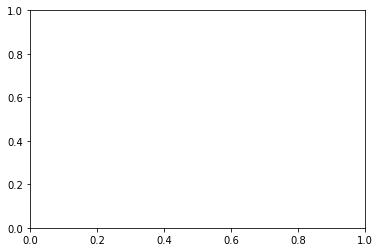

In [6]:

plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length");
